# Decaying network (parrot neurons)


- a network of 100 excitatory cells without any recurrent connections and inhibitions

In [1]:
# fileName

fileName = 'eg_decaying-network' 

In [13]:
# libs
%matplotlib inline
import pyNN.spiNNaker as sim
from pyNN import space 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# simulation settings

sim.setup(
        timestep=1, # [ms]
        min_delay=1, # [ms]
        max_delay=100) # [ms]

simtime = 250 #ms

2023-03-11 14:41:37 INFO: Read cfg files: /home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/spinnaker/.spynnaker.cfg
2023-03-11 14:41:37 INFO: Will search these locations for binaries: /home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spinn_front_end_common/common_model_binaries : /home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spynnaker/pyNN/model_binaries
2023-03-11 14:41:37 WARNING: /home/spinnaker/CNT-2023/SpiNNaker/reports has 27 old reports that have not been closed
2023-03-11 14:41:37 WARNING: /home/spinnaker/CNT-2023/SpiNNaker/application_generated_data_files has 28 old reports that have not been closed
2023-03-11 14:41:37 INFO: Setting time scale factor to 1.
2023-03-11 14:41:37 INFO: Setting machine time step to 1000 micro-seconds.


['/home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/spinnaker/sPyNNaker/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/spinnaker/.spynnaker.cfg']


In [4]:
# defining the network

pops = {}
n_cells = {}
neuron_Model = {}
neuron_ModelPars = {}
initial_Values = {}

for popName in ['network']:
    n_cells[popName] = 100
    neuron_Model[popName] = sim.IF_cond_exp
    neuron_ModelPars[popName] = sim.IF_cond_exp.default_parameters # or standard_pars or testing_pars
    initial_Values[popName] = sim.IF_cond_exp.default_initial_values
    pops[popName] = sim.Population(n_cells[popName], 
                                   neuron_Model[popName],
                                   neuron_ModelPars[popName],
                                   structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0),
                                   label = popName)

    pops[popName].record(['spikes','v','gsyn_exc','gsyn_inh'])   
 


In [5]:
# make the thalamic input sources

popName = 'Thalamus'  

n_cells[popName] = n_cells['network']
spike_times = [[]]*n_cells[popName] #list of spike lists, where one spike list is related to one spike source
#random_sources_idx = [np.random.randint(n_cells[popName]*0.40, n_cells[popName]*0.60) for i in range(n_cells[popName])]
random_sources_idx = np.arange(int(n_cells[popName]*0.40), int(n_cells[popName]*0.60))

for idx, sources in enumerate(random_sources_idx):
    spike_times[sources] = np.sort([abs(np.random.normal(loc=50, scale=10)) for n in range(5)])

neuron_Model[popName] = sim.SpikeSourceArray(spike_times)


pops[popName] = sim.Population(n_cells[popName], 
                               neuron_Model[popName],
                               structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0),
                               label = popName)

proj = {}
proj['Thalamus', 'network'] = sim.Projection(pops['Thalamus'], 
                                         pops['network'],
                                         connector = sim.OneToOneConnector(),
                                         synapse_type = sim.StaticSynapse(weight=0.08, delay=1),
                                         space = space.Space(axes = 'x'),
                                         receptor_type = 'excitatory',
                                         label = 'thalamus-network connections')

fig, axes = plt.subplots(1,1)
axes_list = fig.axes
axes_list[0].eventplot(spike_times)
axes_list[0].set_xlabel('[ms]')
axes_list[0].set_ylabel('thalamic spike sources')
axes_list[0].set_title('rasterplot of spike sources')
axes_list[0].set_xlim(0, simtime)

random_sources_idx

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59])

In [6]:
# run simulation

sim.run(simtime) 

2023-03-11 14:41:37 INFO: Simulating for 250 1.0ms timesteps using a hardware timestep of 1000us
2023-03-11 14:41:37 INFO: Starting execution process
2023-03-11 14:41:40 INFO: Time 0:00:03.070728 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2023-03-11 14:41:49 INFO: Time 0:00:08.539272 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2023-03-11 14:41:54 INFO: Time 0:00:04.916405 taken by PartitionAndPlacePartitioner
Created spalloc job 7064699
2023-03-11 14:41:54 INFO: Created spalloc job 7064699
Waiting for board power commands to complete.
2023-03-11 14:41:54 INFO: Waiting for board power commands to complete.
2023-03-11 14:42:03 INFO: Time 0:00:08.939055 taken by SpallocAllocator
2023-03-11 1

250.0

In [7]:
# save the results
outputs = {}

for layer in ['network']:
    outputs[layer] = pops[layer].get_data()
    for recording in ['v', 'gsyn_inh', 'gsyn_exc', 'spikes']:
        pops[layer].write_data(fileName + '_' + str(layer) + '_' + str(recording) + '.pkl')

Getting spikes for network
|0%                          50%                         100%|
Getting v for network
|0%                          50%                         100%|
Getting gsyn_exc for network
|0%                          50%                         100%|
Getting gsyn_inh for network
|0%                          50%                         100%|
Getting spikes for network
|0%                          50%                         100%|
Getting v for network
|0%                          50%                         100%|
Getting gsyn_exc for network
|0%                          50%                         100%|
Getting gsyn_inh for network
|0%                          50%                         100%|
Getting spikes for network
|0%                          50%                         100%|
Getting v for network
|0%                          50%                         100%|
Getting gsyn_exc for network
|0%                          50%                         100%|
Getting gsyn_in

In [14]:
# check results

def recover_results(outputs):
    results = {}
    for key in outputs.keys(): # to extract the name of the layer, e.g., Exc, Inh, Thalamus, etc  
        
        # to get voltage and conductances
        for analogsignal in outputs[key].segments[0].analogsignals:
            print(analogsignal.name)
            results[key, analogsignal.name] = analogsignal

        # to get spikes
        results[key, 'spikes'] = outputs[key].segments[0].spiketrains
    return results

results = recover_results(outputs)
results.keys()

v
gsyn_exc
gsyn_inh


dict_keys([('network', 'v'), ('network', 'gsyn_exc'), ('network', 'gsyn_inh'), ('network', 'spikes')])

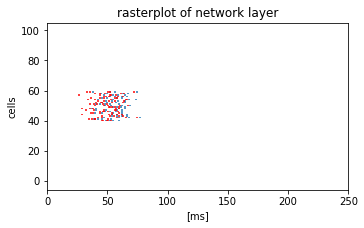

In [15]:
# check the spikes

fig, axes = plt.subplots(1, 1)
fig.tight_layout(pad=5)
axes_list = fig.axes

for idx, value in enumerate(['network']):
    axes_list[idx].eventplot(results[value, 'spikes'])
    axes_list[idx].eventplot(spike_times, color='r')
    axes_list[idx].set_title('rasterplot of ' + str(value) + ' layer')
    axes_list[idx].set_xlabel('[ms]')
    axes_list[idx].set_ylabel('cells')
    axes_list[idx].set_xlim(0, simtime)


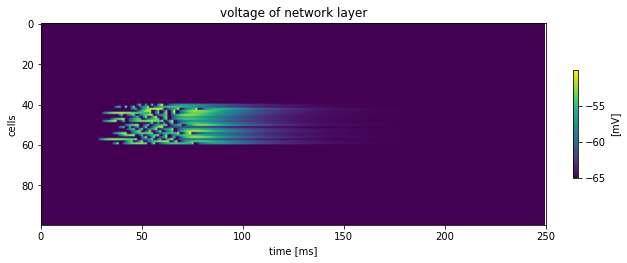

In [16]:
# check the voltage

fig, axes = plt.subplots(1, 1, figsize=(9,9))
fig.tight_layout(pad=4)

axes_list = fig.axes

for idx, value in enumerate(['network']):
    im = axes_list[idx].imshow(results[value, 'v'].T)
    axes_list[idx].set_title('voltage of ' + str(value) + ' layer')
    axes_list[idx].set_xlabel('time [ms]')
    axes_list[idx].set_ylabel('cells')
    axes_list[idx].set_xlim(0, simtime)
    fig.colorbar(im, ax=axes_list[idx], fraction=0.010, label='[mV]')

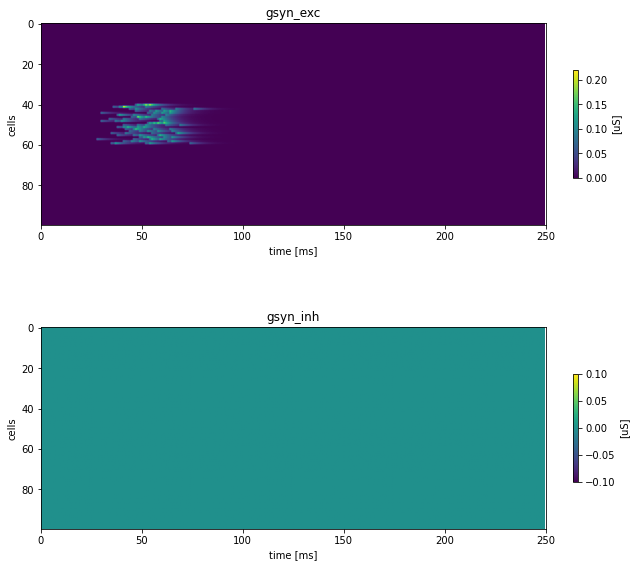

In [17]:
# check the conductances

# check the voltage

fig, axes = plt.subplots(2, 1, figsize=(9,9))
fig.tight_layout(pad=4)

axes_list = fig.axes

for idx, value in enumerate(['network']):
    for idx, gsyn in enumerate(['gsyn_exc', 'gsyn_inh']):
        im = axes_list[idx].imshow(results['network', gsyn].T)
        axes_list[idx].set_title(str(gsyn))
        axes_list[idx].set_xlabel('time [ms]')
        axes_list[idx].set_ylabel('cells')
        axes_list[idx].set_xlim(0, simtime)
        fig.colorbar(im, ax=axes_list[idx], fraction=0.010, label='[uS]')

In [18]:
# end simulation

sim.end()

2023-03-11 14:44:31 ERROR: Ignoring call to stop/end as no simulator running
